## 초기설정

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [2]:
# 시스템 운영체제에 맞는 폰트를 불러와 적용하기
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family

font_family = get_font_family()

/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [5]:
# 폰트설정
plt.rc("font", family=font_family)

# 마이너스 폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

## 데이터 불러오기

In [93]:
path = '/content/gdrive/MyDrive/Data Analysis/kaggle/online-retail/data'
os.listdir(path)

['Online Retail.xlsx']

In [94]:
df = pd.read_excel(path + '/Online Retail.xlsx')
df.shape

(541909, 8)

In [95]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


- InvoiceNo : 주문번호
- StockCode : 품목번호
- Description : 품목명
- Quantity : 수량
- InvoiceDate : 주문일자
- UnitPrice : 판매단가?
- CustomerID : 주문자ID
- Country : 주문국가

In [97]:
# 결측치 확인
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [98]:
# 기술통계값 - 연속형 변수
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Quantity와 UnitPrice가 -값인 경우가 있으므로 제거해줄 필요가 있다.

## 데이터 전처리

In [99]:
print('-값 제거 전: ', df.shape)

-값 제거 전:  (541909, 8)


In [100]:
df = df[df['UnitPrice'] > 0]
print('-값 제거 후: ', df.shape)

-값 제거 후:  (539392, 8)


In [109]:
df = df[df['Quantity'] > 0]
print('-값 제거 후: ', df.shape)

-값 제거 후:  (530104, 8)


In [110]:
# 기술통계값 - 범주형 변수
df.describe(include='object')

,InvoiceNo,StockCode,Description,Country
count,530104,530104,530104,530104
unique,19960,3922,4026,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,1114,2265,2323,485123


InvoiceNo
- 총 주문건수는 19,960건
- 건당 최다주문 1,114개

StockCode
- 주문 품목 : 3,922건
- 최다주문 품목 : 85123A(2,265회)
- StockCode와 Description이 일치하지 않는 것으로 보아 하나으 StockCode에 여러 Description을 공유하는 것으로 보인다 

Country
- 최빈주문국가 : 영국

In [87]:
# 데이터가 정확하지 않음을 확인할 수 있다.
df[df['StockCode'] == '85123A']['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER    563
CREAM HANGING HEART T-LIGHT HOLDER      3
Name: Description, dtype: int64

In [88]:
df[df['Description'] == 'WHITE HANGING HEART T-LIGHT HOLDER']['StockCode'].value_counts()

85123A    563
85123a     42
Name: StockCode, dtype: int64

In [89]:
# 숫자와 문자열의 대소관계가 정의되어 있지 않아 정렬할 수 없음
# df.sort_values(by='StockCode', ascending=True)

In [112]:
# 품목명이 없는 값 - 매출액에 미반영
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


## 탐색적 데이터 분석(EDA)

### 회원/비회원 구분하기

In [118]:
# 회원/비회원 여부를 구분해주는 함수
def member_type(x):
  if x > 0: # 회원ID 변수가 int 타입이며 0보다 큰 숫자를 가지고 있다.
    x = 'member'
  else: # 비회원은 NaN
    x = 'non-member'
  return x

In [123]:
# 회원/비회원 구분
df['CustomerType'] = df['CustomerID'].apply(lambda x: member_type(x))
df['CustomerType'].value_counts()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


member        397884
non-member    132220
Name: CustomerType, dtype: int64

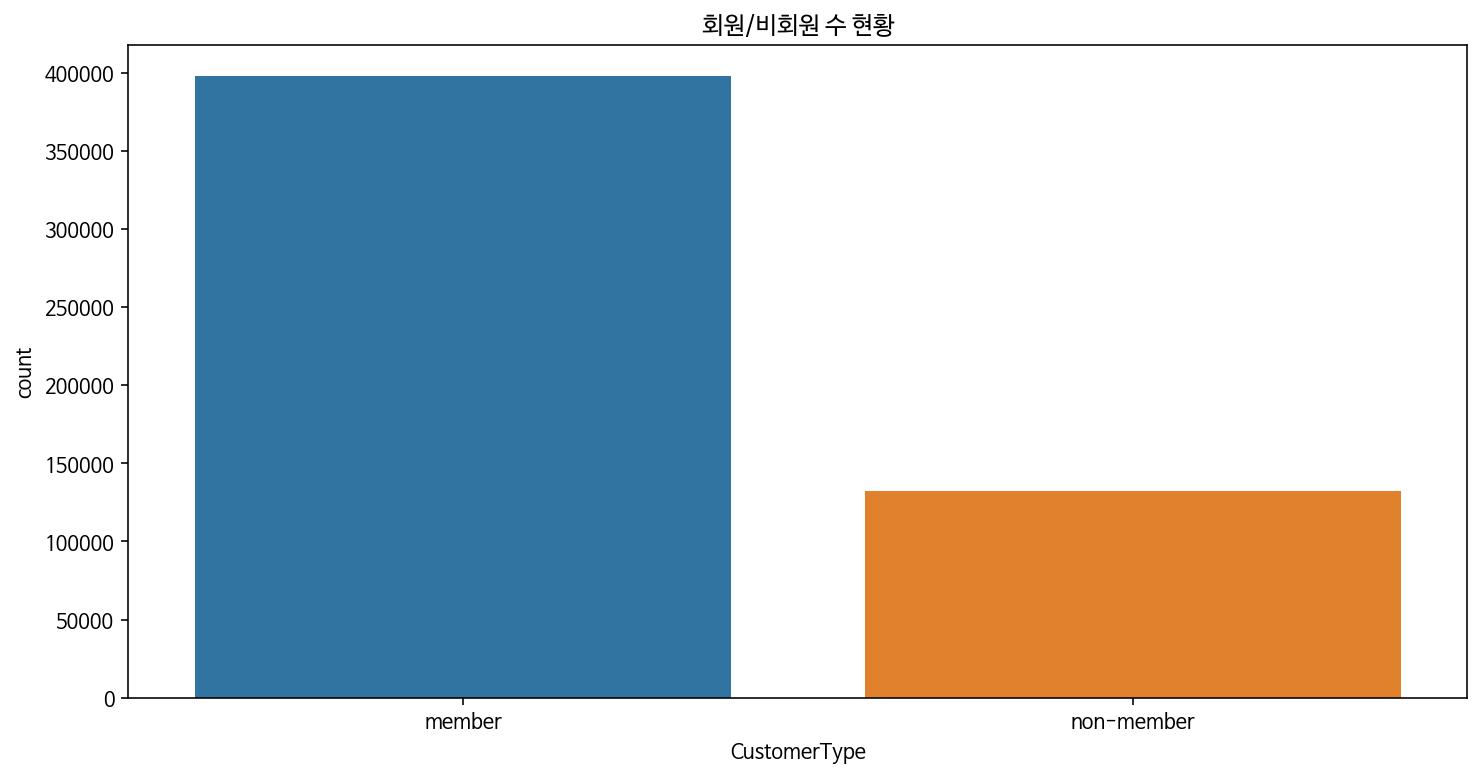

In [133]:
plt.figure(figsize=(12,6))
g = sns.countplot(data=df, x='CustomerType')
plt.title('회원/비회원 수 현황')
plt.show()

### 주문금액

In [125]:
# 주문금액 컬럼 만들기
df['Sales'] = df['Quantity'] * df['UnitPrice']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [135]:
# 총 주문금액
df['Sales'].sum()

10666684.544

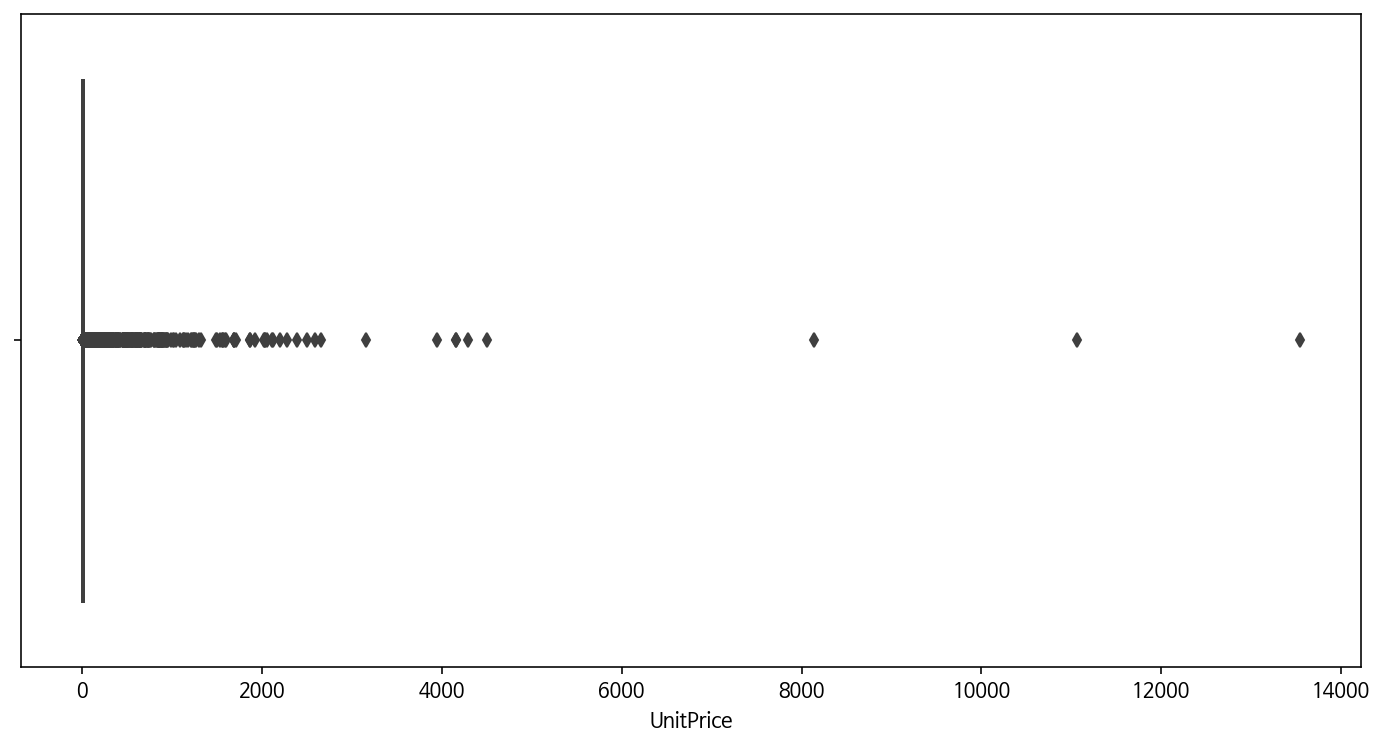

In [197]:
plt.figure(figsize=(12,6))
g = sns.boxplot(data=df, x='UnitPrice')

In [138]:
# 회원여부에 따른 매출액
df.groupby(['CustomerType'])['Sales'].sum()

CustomerType
member        8911407.904
non-member    1755276.640
Name: Sales, dtype: float64

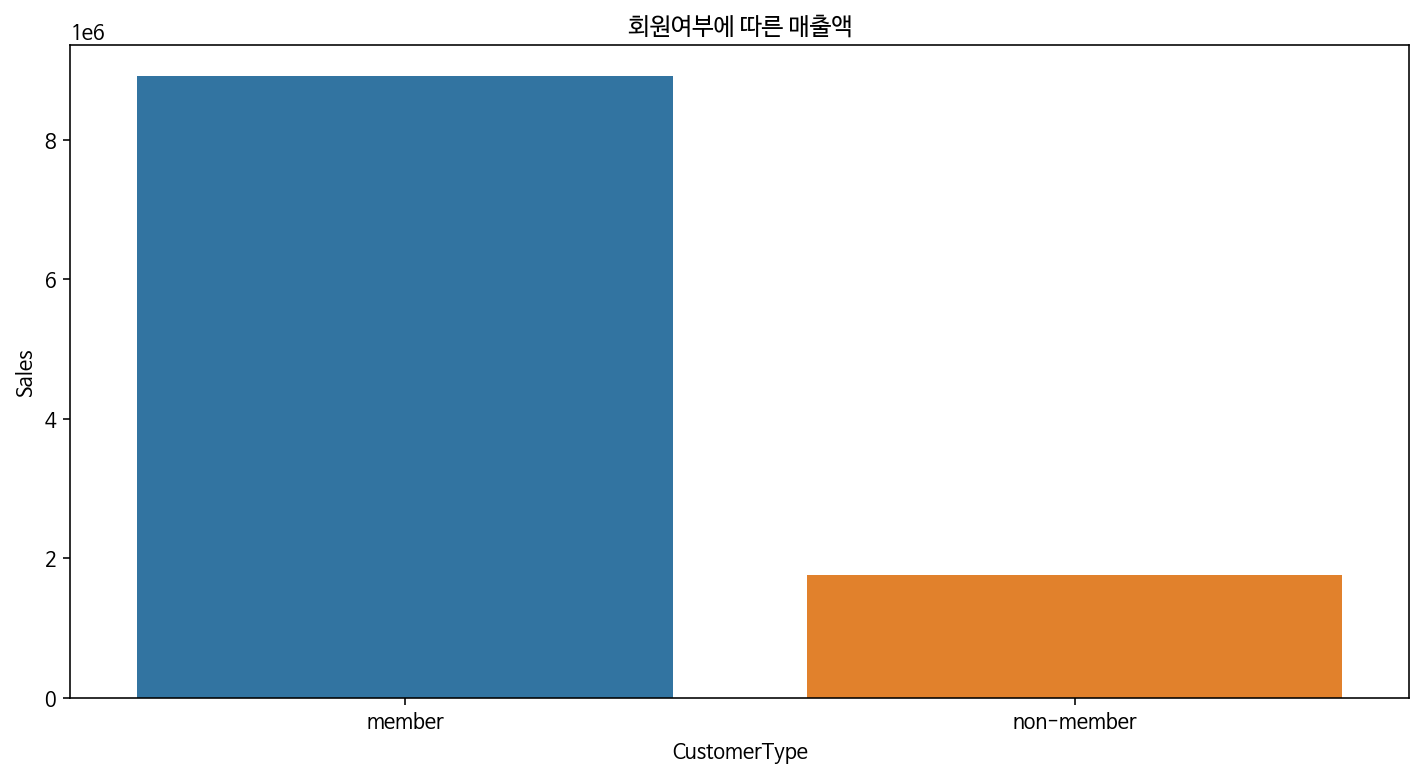

In [140]:
# 회원여부에 따른 매출액 시각화
plt.figure(figsize=(12,6))
g = sns.barplot(data=df, x='CustomerType', y='Sales', ci=None, estimator=np.sum)
plt.title('회원여부에 따른 매출액')
plt.show()

In [142]:
# 날짜 변수 생성
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df['Dow'] = df['InvoiceDate'].dt.dayofweek
df['Hour'] = df['InvoiceDate'].dt.hour

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [143]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CustomerType,Sales,Year,Month,YearMonth,Dow,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,member,15.30,2010,12,2010-12,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,member,20.34,2010,12,2010-12,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,member,22.00,2010,12,2010-12,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,member,20.34,2010,12,2010-12,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,member,20.34,2010,12,2010-12,2,8


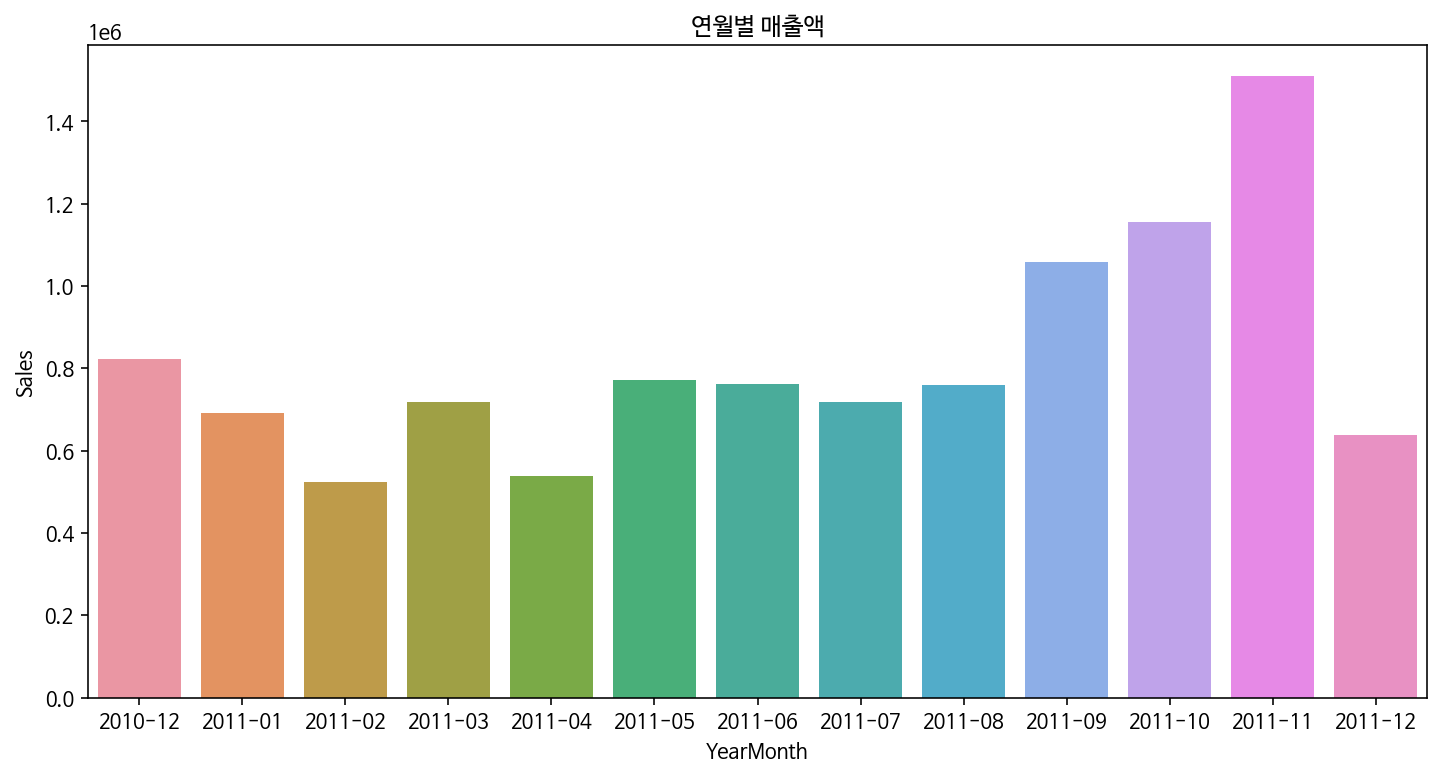

In [199]:
plt.figure(figsize=(12,6))
g = sns.barplot(data=df, x='YearMonth', y='Sales', ci=None, estimator=np.sum)
plt.title('연월별 매출액')
plt.show()

매출이 지속적으로 증가하다가 마지막 12월에 급감하였다.

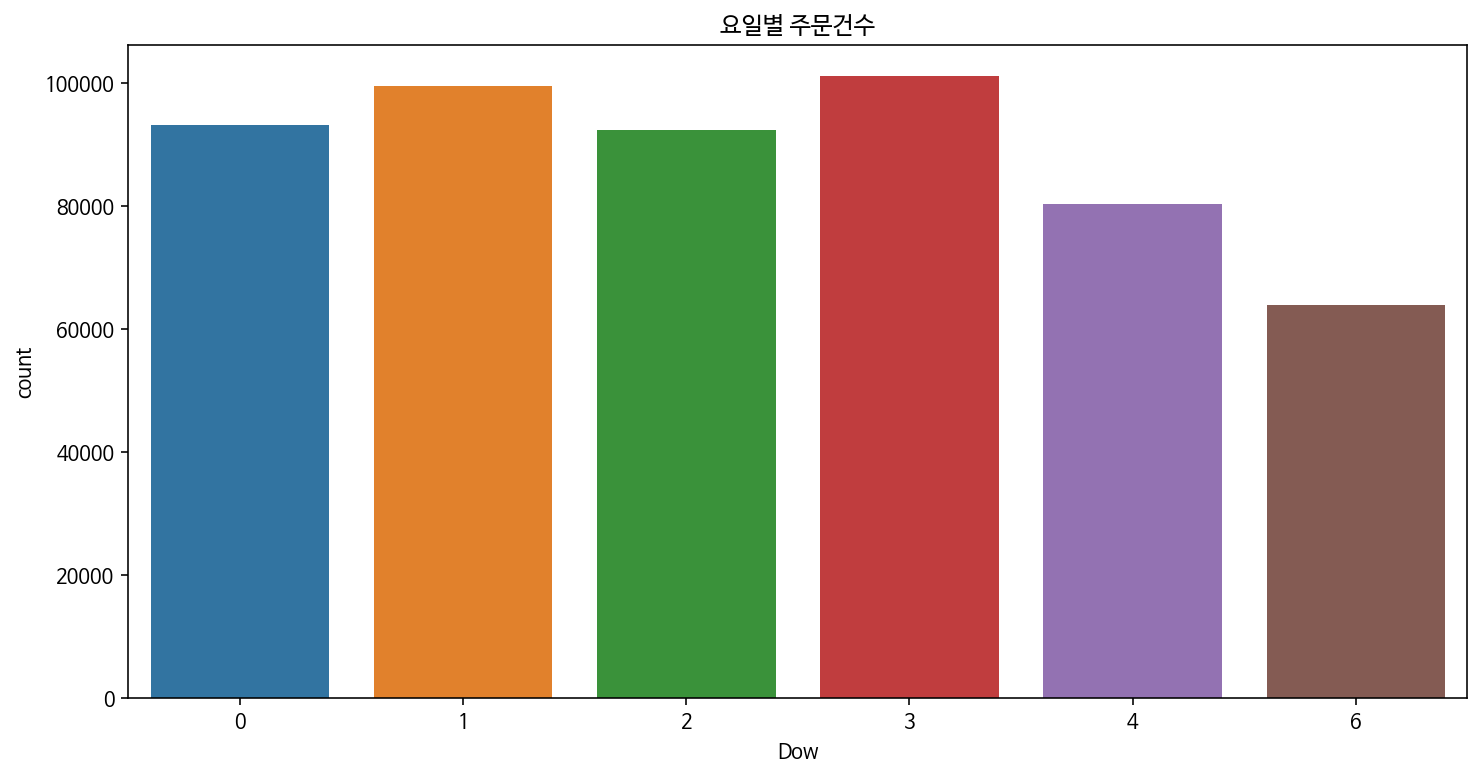

In [200]:
plt.figure(figsize=(12,6))
g = sns.countplot(data=df, x='Dow')
plt.title('요일별 주문건수')
plt.show()

토요일 주문이력이 없다.

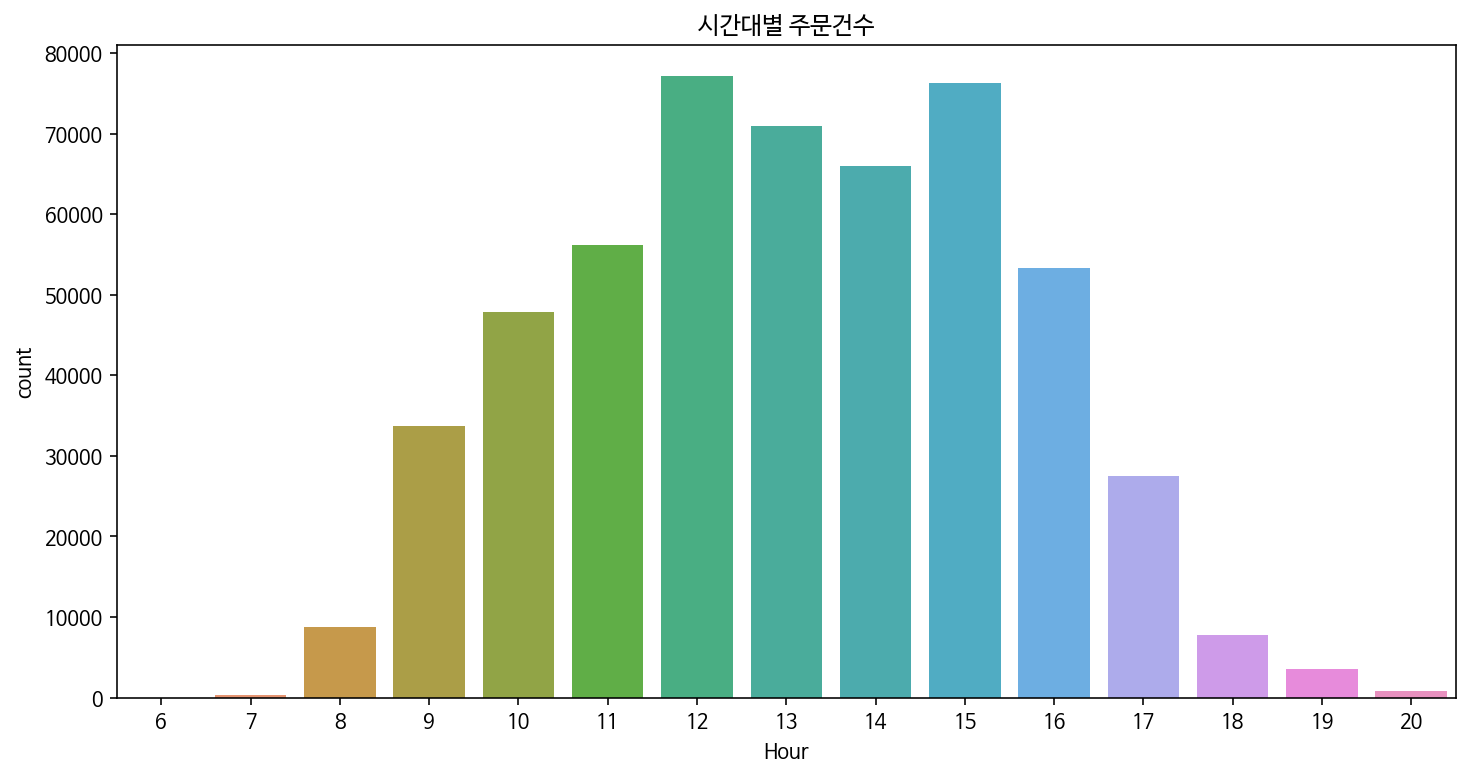

In [198]:
plt.figure(figsize=(12,6))
g = sns.countplot(data=df, x='Hour')
plt.title('시간대별 주문건수')
plt.show()

오후 12~15시 사이에 주문건수가 가장 많다.

### 고객별 주문현황

In [191]:
# 고객별 주문금액
customer_sales = df.groupby(['CustomerID'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
customer_sales

,CustomerID,Sales
1689,14646.0,280206.02
4201,18102.0,259657.30
3728,17450.0,194550.79
3008,16446.0,168472.50
1879,14911.0,143825.06
...,...,...
3323,16878.0,13.30
4098,17956.0,12.75
3014,16454.0,6.90
1793,14792.0,6.20


가장 주문을 많이 한 고객의 회원ID는 14646이다.

In [192]:
# 고객별 주문건수
customer_orders = df.groupby(['CustomerID'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
customer_orders = customer_orders.rename(columns={'InvoiceNo':'Orders'})
customer_orders

,CustomerID,Orders
4010,17841.0,7847
1879,14911.0,5675
1289,14096.0,5111
326,12748.0,4595
1661,14606.0,2700
...,...,...
4013,17846.0,1
514,13017.0,1
571,13099.0,1
576,13106.0,1


In [194]:
# 건당가 계산하기
customers = pd.merge(customer_sales, customer_orders, how='left', on='CustomerID')
customers['Avg_sales'] = customers['Sales'] / customers['Orders']
customers

,CustomerID,Sales,Orders,Avg_sales
0,14646.0,280206.02,2076,134.973998
1,18102.0,259657.30,431,602.453132
2,17450.0,194550.79,337,577.302047
3,16446.0,168472.50,3,56157.500000
4,14911.0,143825.06,5675,25.343623
...,...,...,...,...
4333,16878.0,13.30,3,4.433333
4334,17956.0,12.75,1,12.750000
4335,16454.0,6.90,2,3.450000
4336,14792.0,6.20,2,3.100000


### 국가별 주문건수

In [187]:
# 국가별 주문금액
country_sales = df.groupby(['Country'], as_index=False)['Sales'].sum().sort_values(by='Sales', ascending=False)
country_sales

,Country,Sales
36,United Kingdom,9025222.084
24,Netherlands,285446.340
10,EIRE,283453.960
14,Germany,228867.140
13,France,209715.110
0,Australia,138521.310
31,Spain,61577.110
33,Switzerland,57089.900
3,Belgium,41196.340
32,Sweden,38378.330


In [185]:
# 국가별 주문건수
country_orders = df.groupby(['Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
country_orders = country_orders.rename(columns={'InvoiceNo':'Orders'})
country_orders

,Country,Orders
36,United Kingdom,485123
14,Germany,9040
13,France,8407
10,EIRE,7890
31,Spain,2484
24,Netherlands,2359
3,Belgium,2031
33,Switzerland,1966
27,Portugal,1501
0,Australia,1182


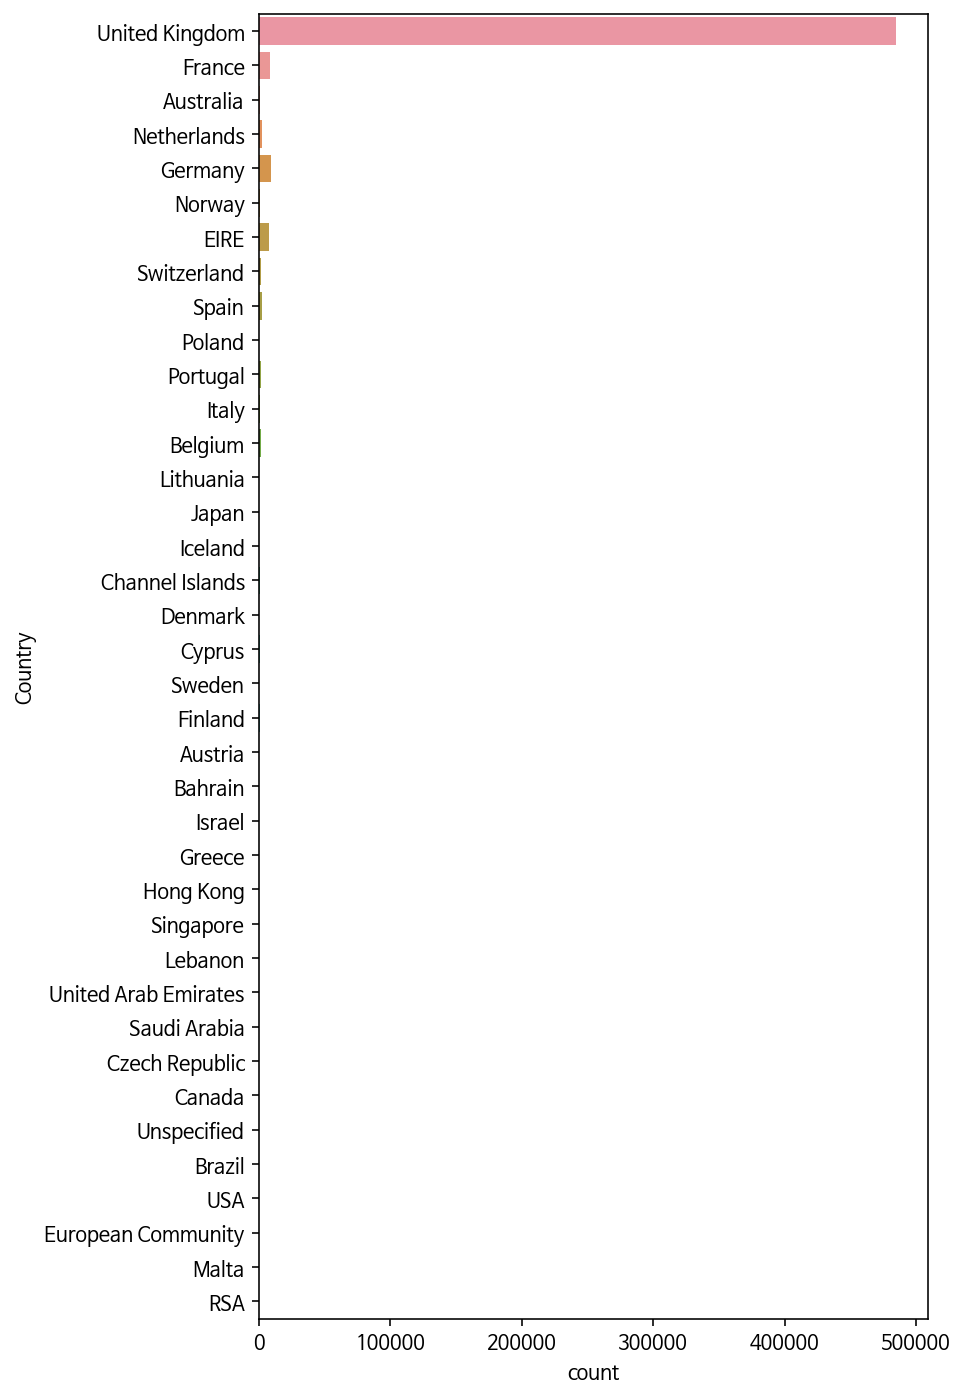

In [153]:
# 국가별 주문건수 시각화
plt.figure(figsize=(6,12))
g = sns.countplot(data=df, y='Country')

대다수의 주문은 영국에서 발생함을 알 수 있다.

In [195]:
country = pd.merge(country_sales, country_orders, how='left', on='Country')
country['Avg_sales'] = country['Sales'] / country['Orders']
country

,Country,Sales,Orders,Avg_sales
0,United Kingdom,9025222.084,485123,18.603987
1,Netherlands,285446.340,2359,121.003111
2,EIRE,283453.960,7890,35.925724
3,Germany,228867.140,9040,25.317162
4,France,209715.110,8407,24.945297
5,Australia,138521.310,1182,117.192310
6,Spain,61577.110,2484,24.789497
7,Switzerland,57089.900,1966,29.038606
8,Belgium,41196.340,2031,20.283772
9,Sweden,38378.330,451,85.096075
